In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
import plotly.express as ex
from datetime import datetime
import os
import sys 

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [42]:
import tensorflow as tf
from keras.layers import (
    Input,
    LSTM,
    Dropout,
    Dense
)
from keras.models import (
    Model,
    Sequential,
    load_model
)
from keras.metrics import MeanAbsoluteError

In [8]:
def locate_input_file(input_file_name="gold_price_2013_2023.csv"):
    try:
        dir_name=os.getcwd()
        input_file_path=os.path.join(dir_name,input_file_name)
        # print(input_file_path)
        return input_file_path
    
    except Exception as e:
        print(f"error : {e}")

In [9]:
def get_input_data(file_path):
    
    try:
        df=pd.read_csv(file_path)
        return df
    
    except Exception as e:
        print(f"error : {e}")



In [12]:
def print_details(df):
    try:
        print(f"shape of df : {df.shape}\n")
        print(f"columns of df : {df.columns}\n\n")
        print(f"information about df : \n{df.info()}\n\n")
        print(f"description about df : \n{df.describe()}\n\n")
        print(f"head of df : \n{df.head()}\n\n")
        print(f"tail of df : \n{df.tail()}\n\n")

        for col in df.columns:    
            print(f"value count of df : \n {df[col].value_counts()}")    

    except Exception as e:
        print(f"error : {e}")

In [13]:
def remove_unwanted_columns(df,unwanted_columns):
    try:
        # unwanted_columns=['Open', 'High', 'Low', 'Vol.', 'Change %']
        unwanted_count=len(unwanted_columns)
        # print(unwanted_count)
        temp_count=0
        for col in unwanted_columns:
            if col in df.columns:
                temp_count+=1

        
        if temp_count==unwanted_count :
            print(f"all unwanted columns can be removed.")
        else:
            print(f"all unwanted columns can not be removed.")

        df=df.drop(columns=unwanted_columns,axis=1)

        return df
    
    except Exception as e:
        print(f"error : {e}")

In [14]:
def sort_date(df):
    try:
        df.sort_values(
            by=["Date"],
            axis=0,
            ascending=True,
            inplace=True
        )
        return df

    except Exception as e:
        print(f"error : {e}")

In [15]:
def clean_data(df):
    try:
        df["Date"]=pd.to_datetime(df["Date"])
        df["Price"]=df["Price"].str.replace(",","").astype(float)
        df=sort_date(df)

        return df

    except Exception as e:
        print(f"error : {e}")

In [16]:
def handle_missing(df):
    try:
        print(f"Column-wise missing values:\n{df.isnull().sum()}\n")
        print(f"Total missing values: {df.isnull().sum().sum()}\n")

        num_cols = df.select_dtypes(include=["int64", "float64"]).columns
        cat_cols = df.select_dtypes(include="object").columns

        print(f"Numerical columns: {list(num_cols)}")
        print(f"Categorical columns: {list(cat_cols)}")

        # Fill missing values
        for col in num_cols:
            df[col] = df[col].fillna(df[col].mean())

        for col in cat_cols:
            df[col] = df[col].fillna(df[col].mode()[0])

        return df

    except Exception as e:
        print("Error:", e)
def handle_missing(df):
    try:
        print(f"Column-wise missing values:\n{df.isnull().sum()}\n")
        print(f"Total missing values: {df.isnull().sum().sum()}\n")

        num_cols = df.select_dtypes(include=["int64", "float64"]).columns
        cat_cols = df.select_dtypes(include="object").columns

        print(f"Numerical columns: {list(num_cols)}")
        print(f"Categorical columns: {list(cat_cols)}")

        # Fill missing values
        for col in num_cols:
            df[col] = df[col].fillna(df[col].mean())

        for col in cat_cols:
            df[col] = df[col].fillna(df[col].mode()[0])

        return df

    except Exception as e:
        print("Error:", e)


In [17]:
def handle_duplicate(df):
    try:
        duplicate_count=df.duplicated().sum()
        print(f"duplicated  values : {duplicate_count}")
        
        if duplicate_count>0:
            df.drop_duplicates(ignore_index=True)

        return df

    except Exception as e:
        print(e)

In [52]:
def build_train_dataset(df,start_point,test_size,window):
    try:
        train_data=df["Price"][:-test_size].to_numpy().reshape(-1,1)
        date_train=[]
        x_train=[]
        y_train=[]

        for i in range(start_point+1,len(train_data)):
            x_train.append(train_data[i-window:i,0])
            y_train.append(train_data[i,0])
            date_train.append(df["Date"].iloc[i])
            # date_train.append(df["Date"][i])

        x_train=np.array(x_train)
        y_train=np.array(y_train)
        date_train=np.array(date_train)

        print(f"date_train shape :{date_train.shape}")
        print(f"x_train shape :{x_train.shape}")
        print(f"y_train shape :{y_train.shape}")


        return date_train,x_train,y_train

    except Exception as e:
        print(f"error : {e}")

In [ ]:
# def build_test_dataset(df,start_point,test_size,window):
#     try:
                
#         test_data=df["Price"][-test_size-window:].to_numpy().reshape(-1,1)
#         x_test=[]
#         y_test=[]

#         for i in range(window,len(test_data)):
#             x_test.append(test_data[i-window:i,0])
#             y_test.append(test_data[i,0])

#         x_test=np.array(x_test)
#         y_test=np.array(y_test)
        
#         print(f"date_train shape :{date_train.shape}")
#         print(f"x_train shape :{x_train.shape}")
#         print(f"y_train shape :{y_train.shape}")

#         return x_test,y_test

#     except Exception as e:
#         print(f"error : {e}")

240


240


In [20]:
def test_training():
    try:
        input_file_path=locate_input_file()
        print(input_file_path)  


        df=get_input_data(input_file_path)
        print_details(df)

        unwanted_columns=['Open', 'High', 'Low', 'Vol.', 'Change %']
        df=remove_unwanted_columns(df,unwanted_columns)
        print_details(df)

        df=clean_data(df)
        print(df.head())
        print(df.tail())
        

        df=handle_missing(df)

        df=handle_duplicate(df)

        return df



    except Exception as e:
        print(f"error : {e}")

In [22]:
df=test_training()

e:\data_science_play_ground\gold_price_prediction\gold_price_2013_2023.csv
shape of df : (2583, 7)

columns of df : Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2583 non-null   object
 1   Price     2583 non-null   object
 2   Open      2583 non-null   object
 3   High      2583 non-null   object
 4   Low       2583 non-null   object
 5   Vol.      2578 non-null   object
 6   Change %  2583 non-null   object
dtypes: object(7)
memory usage: 141.4+ KB
information about df : 
None


description about df : 
              Date     Price      Open      High       Low   Vol. Change %
count         2583      2583      2583      2583      2583   2578     2583
unique        2583      2072      2061      2044      2019   1550      474
top     12/30/2022  1,294.30

In [51]:
df.head(),df.tail()

(           Date   Price
 2582 2013-01-02  1689.9
 2581 2013-01-03  1675.6
 2580 2013-01-04  1649.9
 2579 2013-01-07  1647.2
 2578 2013-01-08  1663.2,
         Date   Price
 4 2022-12-26  1809.7
 3 2022-12-27  1823.1
 2 2022-12-28  1815.8
 1 2022-12-29  1826.0
 0 2022-12-30  1826.2)

In [39]:
windows=[5,20,60,120,240]
mx_size=max(windows)
test_size=df[df["Date"].dt.year==2022].shape[0]

windows,mx_size,test_size

([5, 20, 60, 120, 240], 240, 260)

In [46]:
def plot_difference_figure(
        x1,y1,
        x2,y2
):
    try:
        plt.figure(
            figsize=(15,6),
            dpi=150
        )
        plt.rcParams["axes.facecolor"] = "pink"
        plt.rcParams["axes.edgecolor"] = "white"
        plt.plot(
            x1,y1,
            color="blue",
            lw=2
        )
        plt.plot(
            x2,y2,
            color="yellow",
            lw=2
        )
        plt.legend(
            [
                "Training set",
                "Test set"
            ],
            loc="upper left",
            prop={"size":15}
        )
        plt.grid(color="white")
        plt.show()


    except Exception as e:
        print(f"error : {e}")

In [55]:
def plot_figure(x,y):
    plt.plot(
        x,y,
        color="yellow",
        lw=2
    )
    plt.show()

date_train shape :(2081,)
x_train shape :(2081, 5)
y_train shape :(2081,)
start date : 2013-12-09 00:00:00,end date : 2021-12-31 00:00:00
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


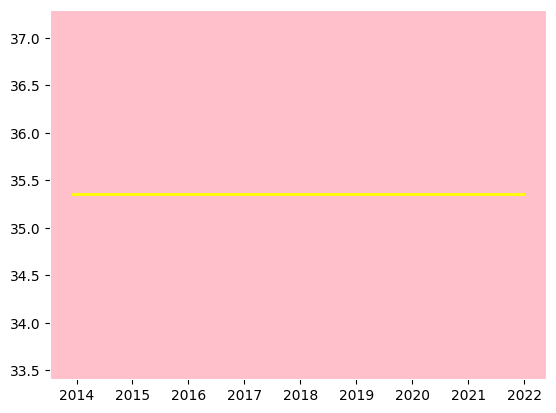

date_train shape :(2081,)
x_train shape :(2081, 20)
y_train shape :(2081,)
start date : 2013-12-09 00:00:00,end date : 2021-12-31 00:00:00
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


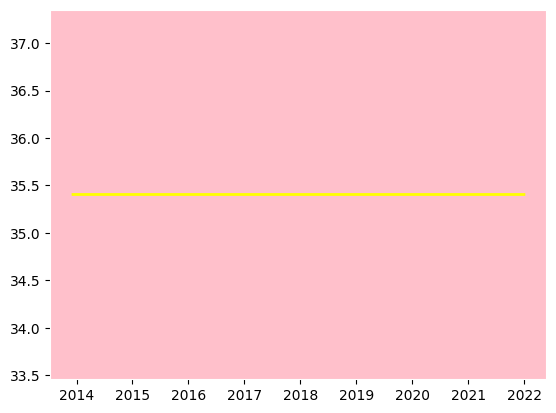

date_train shape :(2081,)
x_train shape :(2081, 60)
y_train shape :(2081,)
start date : 2013-12-09 00:00:00,end date : 2021-12-31 00:00:00
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


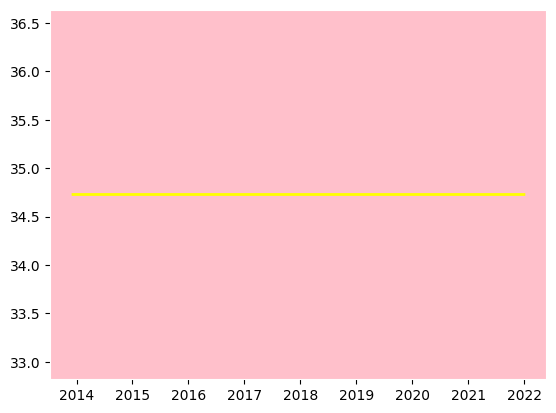

date_train shape :(2081,)
x_train shape :(2081, 120)
y_train shape :(2081,)
start date : 2013-12-09 00:00:00,end date : 2021-12-31 00:00:00
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


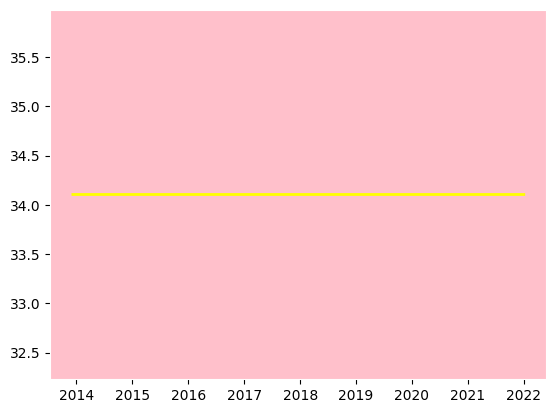

date_train shape :(2081,)
x_train shape :(2081, 240)
y_train shape :(2081,)
start date : 2013-12-09 00:00:00,end date : 2021-12-31 00:00:00
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step


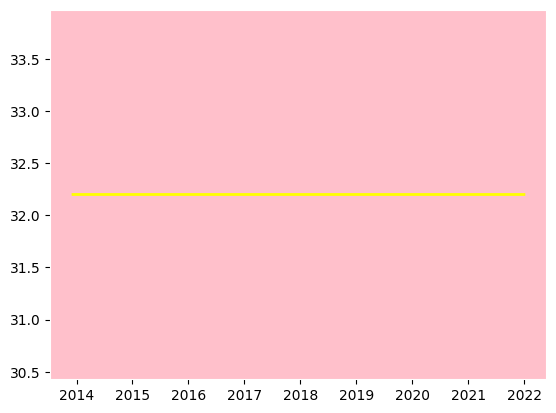

In [56]:
for window in windows:
    model_file_name=f"model_{window}_.keras"
    model = load_model(model_file_name)  

    date,x_train,y_train=build_train_dataset(
        df,
        mx_size+1,
        test_size,
        window
    )
    print(f"start date : {date[0]},end date : {date[-1]}")

    y_pred=model.predict(x_train)

    # plot_difference_figure(
    #     df["Date"],df["Price"],
    #     date,y_pred
    # )
    

    plot_figure(date,y_pred)